# 1. 语言处理与 Python
**本章涵盖内容**
1. 将简单的程序与大量的文本结合起来，我们能实现什么？
2. 我们如何能自动提取概括文本风格和内容的关键词和短语？
3. Python 编程语言为上述工作提供了哪些工具和技术？
4. 自然语言处理中的有哪些有趣的挑战？

## 1.1 语言计算：文本和单词
### 搜索文本

In [2]:
# 导入多个文本
from nltk.book import *

*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


In [33]:
# 搜索文本内容
text2.concordance("monstrous")

Displaying 11 of 11 matches:
. " Now , Palmer , you shall see a monstrous pretty girl ." He immediately went
your sister is to marry him . I am monstrous glad of it , for then I shall have
ou may tell your sister . She is a monstrous lucky girl to get him , upon my ho
k how you will like them . Lucy is monstrous pretty , and so good humoured and 
 Jennings , " I am sure I shall be monstrous glad of Miss Marianne ' s company 
 usual noisy cheerfulness , " I am monstrous glad to see you -- sorry I could n
t however , as it turns out , I am monstrous glad there was never any thing in 
so scornfully ! for they say he is monstrous fond of her , as well he may . I s
possible that she should ." " I am monstrous glad of it . Good gracious ! I hav
thing of the kind . So then he was monstrous happy , and talked on some time ab
e very genteel people . He makes a monstrous deal of money , and they keep thei


In [34]:
# 搜索文本中与目标词相似的内容
text2.similar("monstrous")

very so exceedingly heartily a as good great extremely remarkably
sweet vast amazingly


In [32]:
# 两个或以上词的共同上下文
text2.common_contexts(["monstrous", "very"])

a_pretty am_glad a_lucky is_pretty be_glad


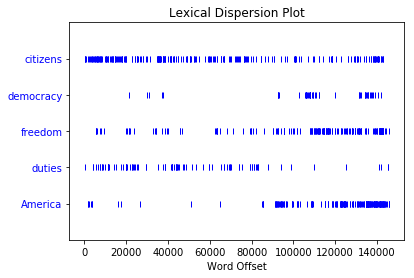

In [38]:
# 词在文本中位置的离散图
text4.dispersion_plot(["citizens", "democracy", "freedom", "duties", "America"])

### 词汇计数

In [3]:
# 文本的总长度
print(len(text3))
# 文本的词汇个数
print(len(set(text3)))
# 显示文本的所有词汇
print(sorted(set(text3))[100:110])

44764
2789
['Benjamin', 'Beno', 'Beor', 'Bera', 'Bered', 'Beriah', 'Bethel', 'Bethlehem', 'Bethuel', 'Beware']


In [50]:
print(text3.count("smote")) # 特殊词出现次数
print(text4.count("a")/len(text4)) # 词的出现次数在文本中的占比

5
0.014643016433938312


## 1.2 近观 Python：将文本当做词链表

In [59]:
# 利用索引查找文本
print(text4[173])
# 利用文本查找索引
print(text4.index('awaken'))

awaken
173


## 1.3 计算语言：简单的统计

### 频率分布

In [5]:
# 词频统计
fdist1 = FreqDist(text1)
print(fdist1['whale'])

906


In [90]:
# 显示n个频率最高的词
fdist1.most_common(10)

[(',', 18713),
 ('the', 13721),
 ('.', 6862),
 ('of', 6536),
 ('and', 6024),
 ('a', 4569),
 ('to', 4542),
 (';', 4072),
 ('in', 3916),
 ('that', 2982)]

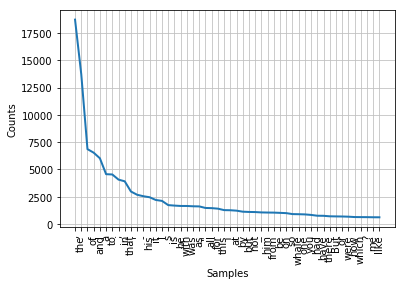

In [70]:
# 词的分布图
fdist1.plot(50, cumulative=False) # 前50个单词的词频统计

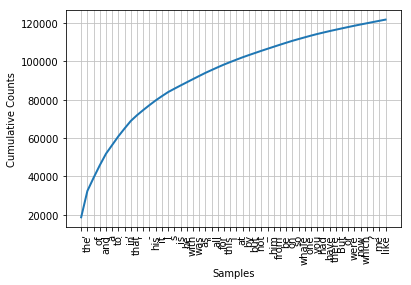

In [68]:
# 累积词频图
fdist1.plot(50, cumulative=True) # 前50个单词的累积占比分布

In [7]:
# 只出现一次的词
print(fdist1.hapaxes()[0:10])

['Herman', 'Melville', ']', 'ETYMOLOGY', 'Late', 'Consumptive', 'School', 'threadbare', 'lexicons', 'mockingly']


### 细粒度选择

In [8]:
# 选择长度大于15的词
V = set(text1)
long_words = [w for w in V if len(w) > 15]
print(sorted(long_words)[0:10])

['CIRCUMNAVIGATION', 'Physiognomically', 'apprehensiveness', 'cannibalistically', 'characteristically', 'circumnavigating', 'circumnavigation', 'circumnavigations', 'comprehensiveness', 'hermaphroditical']


In [10]:
# 选择长度大于7且词频大于7的词
fdist5 = FreqDist(text5)
print(sorted([w for w in set(text5) if len(w) > 7 and fdist5[w] > 7])[10:16])

['football', 'innocent', 'listening', 'remember', 'seriously', 'something']


### 词语搭配和双连词（bigrams）

In [78]:
list(bigrams(['more', 'is', 'said', 'than', 'done']))

[('more', 'is'), ('is', 'said'), ('said', 'than'), ('than', 'done')]

In [81]:
# 找到文本中出现的搭配词
text4.collocations()

United States; fellow citizens; four years; years ago; Federal
Government; General Government; American people; Vice President; Old
World; Almighty God; Fellow citizens; Chief Magistrate; Chief Justice;
God bless; every citizen; Indian tribes; public debt; one another;
foreign nations; political parties


## 1.4 回到 Python:决策与控制

In [11]:
# 找到文本中以comfort结尾的词
print(sorted([w for w in set(text1) if w.startswith('comfort')])[-6:])

['comfortably', 'comforted', 'comforter', 'comforters', 'comforting', 'comforts']


In [12]:
# 找到文本中以ableness结尾的词
print(sorted([w for w in set(text1) if w.endswith('ableness')])[-6:])

['indispensableness', 'indomitableness', 'intolerableness', 'palpableness', 'reasonableness', 'uncomfortableness']


In [14]:
# 找到文本中包含gnt的词
print(sorted([term for term in set(text4) if 'gnt' in term])[-6:])

['Sovereignty', 'sovereignties', 'sovereignty']


In [13]:
# 找到文本中首字母大写的词
print(sorted([item for item in set(text6) if item.istitle()])[-6:])

['Yeah', 'Yes', 'You', 'Your', 'Yup', 'Zoot']


In [15]:
# 找到文本中都是大写字母的词
print(sorted([item for item in set(text6) if item.isupper()])[-6:])

['WIFE', 'WINSTON', 'WITCH', 'WOMAN', 'Y', 'ZOOT']


In [16]:
# 找到文本中的数字
print(sorted([item for item in set(sent7) if item.isdigit()]))

['29', '61']


## 1.5 自动理解自然语言
- 词意消歧
- 指代消解
- 自动生成语言
- 机器翻译
- 人机对话系统
- 文本的含义